### (week 3) Fundamentals of Quantitative Modeling  by University of Pennsylvania
#### Muhammad Kevin Alrahmanto (19/445592/PA/19416, Universitas Gadjah Mada)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Regression Models (Warming Up)

## 1.1 Diamond Price 

In [10]:
diamond=sns.load_dataset('diamonds')

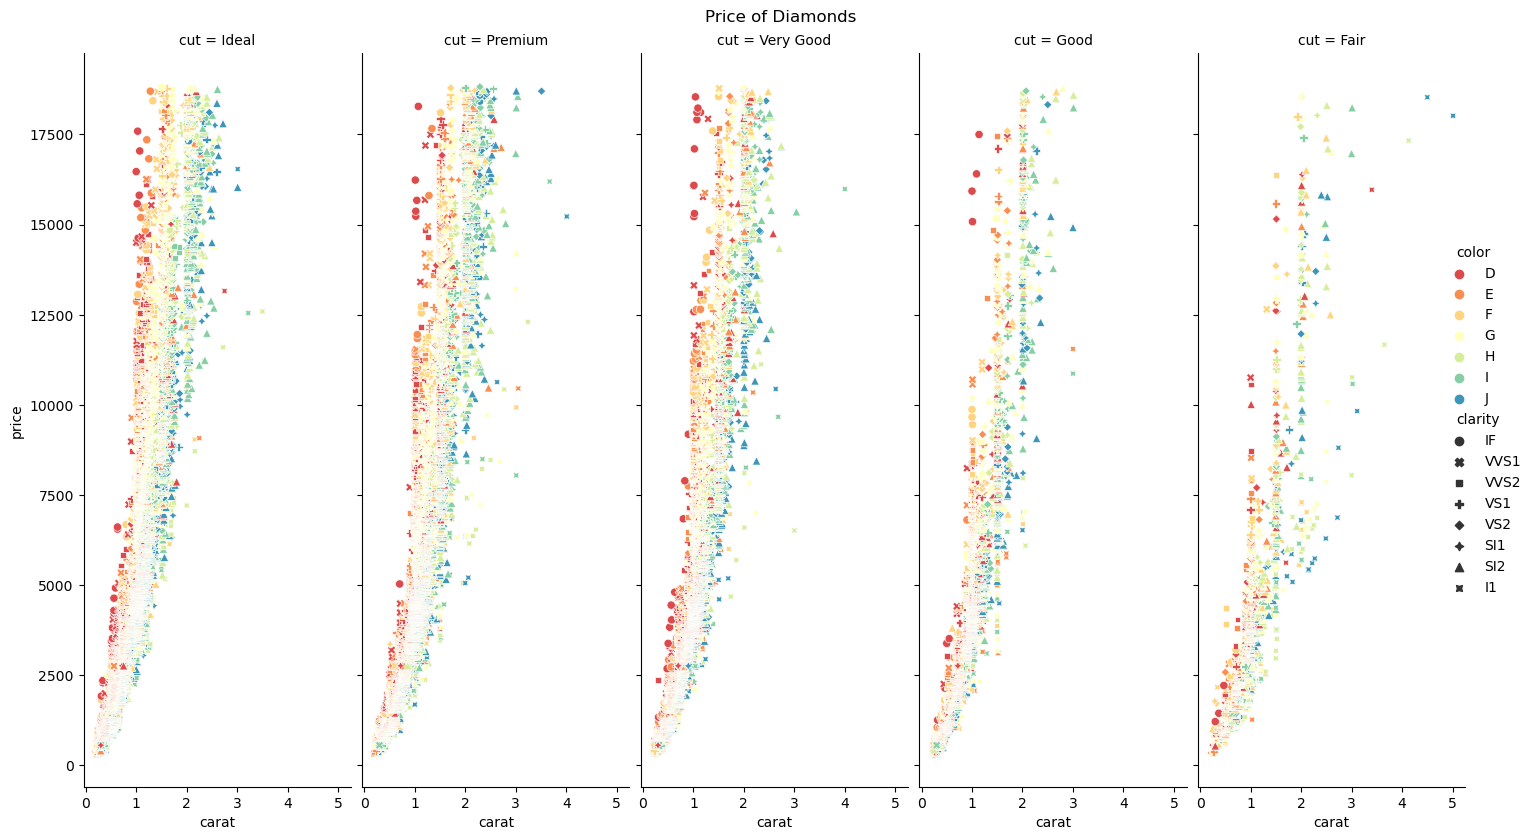

In [13]:
g=sns.relplot(
    data=diamond, x="carat", y="price", col="cut",
    hue="color",style="clarity",
    palette="Spectral", sizes=(10, 100)
)
g.fig.suptitle('Price of Diamonds')
g.fig.set_size_inches(15,9)

# 2. Probabilistic Models

## 2.1 Monte Carlo Simulation (Demand Model)

In [3]:
import sympy as smp

In [4]:
price, b, c = smp.symbols('price b c')
profit= 60000*price**(b)*(price-c)

In [5]:
profit_first_derivative=smp.diff(profit, price)
profit_first_derivative

60000*b*price**b*(-c + price)/price + 60000*price**b

In [6]:
opt_price=smp.solve(profit_first_derivative,price)
opt_price[0]

b*c/(b + 1)

In [7]:
f_opt_price = smp.lambdify([b, c], opt_price)

Assume that the price of production is constant at c = 2 for each unit and b is taken from a uniform distribution between -2.9 and -2.1

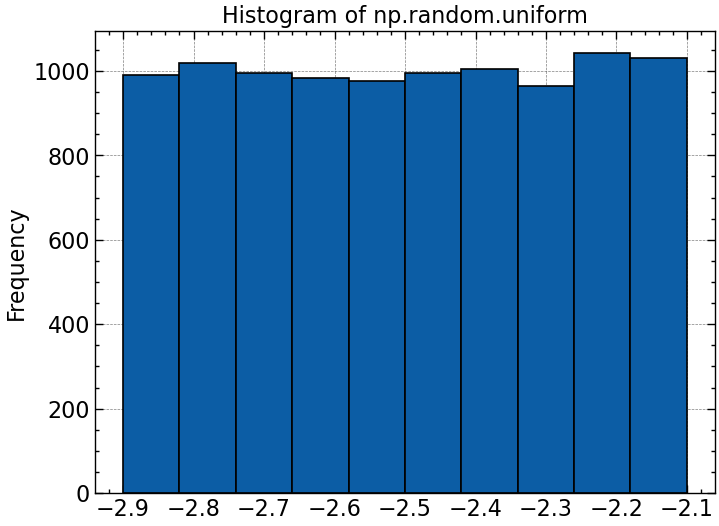

In [33]:
np.random.seed(2022)
plt.hist(np.random.uniform(-2.1, -2.9, 10000), edgecolor='black', linewidth=1.2)
plt.ylabel('Frequency')
plt.title('Histogram of np.random.uniform')
plt.show()

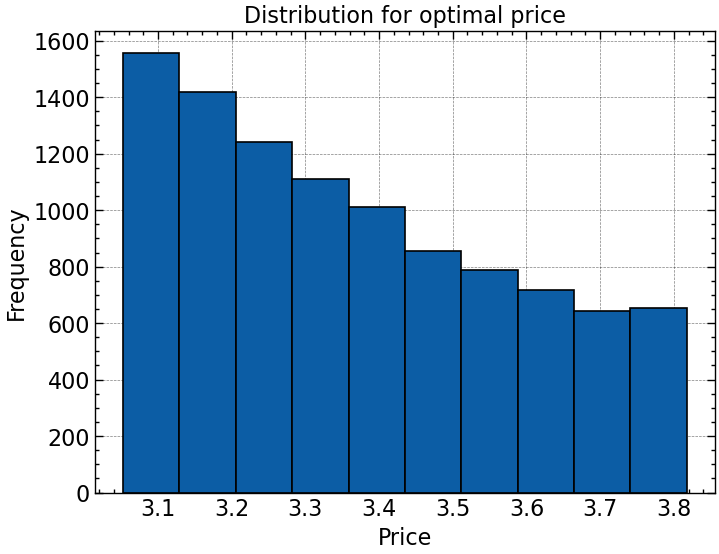

In [35]:
np.random.seed(2022)
opt_price_dist=[f_opt_price(np.random.uniform(-2.1, -2.9, 10000)[i], 2)[0] for i in range(10000)]
plt.hist(opt_price_dist, edgecolor='black', linewidth=1.2)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution for optimal price')
plt.show()

## 2.2 Bernoulli Distribution

In [14]:
from scipy.stats import bernoulli

In [15]:
p=0.65
mean, var = bernoulli.stats(p, moments='mv')
print(f'for p = {p} => mean = {mean}, variance = {np.round(var,2)}, and standard deviation = {np.round(var**0.5,2)}')

for p = 0.65 => mean = 0.65, variance = 0.23, and standard deviation = 0.48


## 2.3 Binomial distribution

In [16]:
from scipy.stats import binom

In [17]:
n = 10
p = 0.5
x_range= list(range(n + 1))

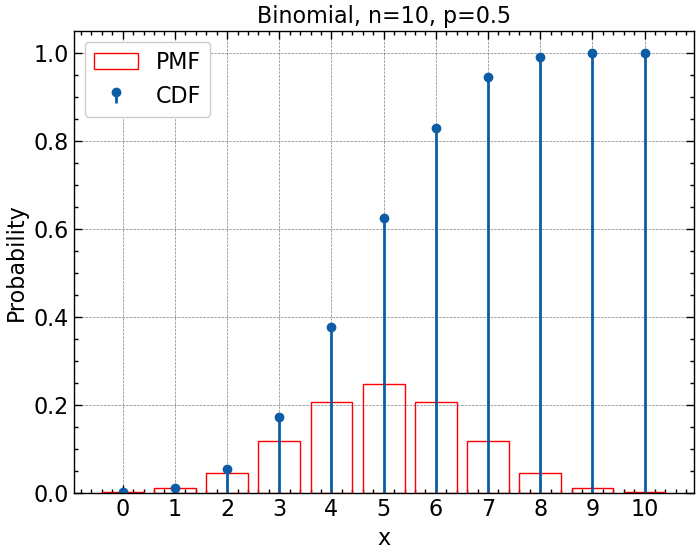

In [30]:
n = 10
p = 0.5
x_range= list(range(n + 1))

dist = [binom.pmf(x, n, p) for x in x_range ]
plt.bar(x_range, dist, fill=False, edgecolor='red', label='PMF')
plt.stem(x_range,np.cumsum(dist), basefmt=" ", label='CDF')
plt.xlabel('x')
plt.ylabel('Probability')
plt.title(f'Binomial, n={n}, p={p}')
plt.xticks(np.linspace(x_range[0], x_range[-1], len(x_range)))

plt.legend(loc="upper left", bbox_to_anchor=(0,1))
plt.show()

In [19]:
#Calculation for the example problem
x, n, p = 2, 4 ,0.6
print(f'*** Number of succsess = {x}, number of trials = {n}, prob. of success = {p} ***')
print(f'P(X={x}) : {binom.pmf(x, n, p)} \nP(X<={x}) : {np.sum([binom.pmf(x, n, p) for x in list(range(x + 1))])}')
mean, variance =binom.stats(n,p, moments='mv')
print(f'mean : {mean}\nvariance : {variance}')

*** Number of succsess = 2, number of trials = 4, prob. of success = 0.6 ***
P(X=2) : 0.3456 
P(X<=2) : 0.5248
mean : 2.4
variance : 0.96


##  2.4 Normal Distribution

In [20]:
from scipy.stats import norm

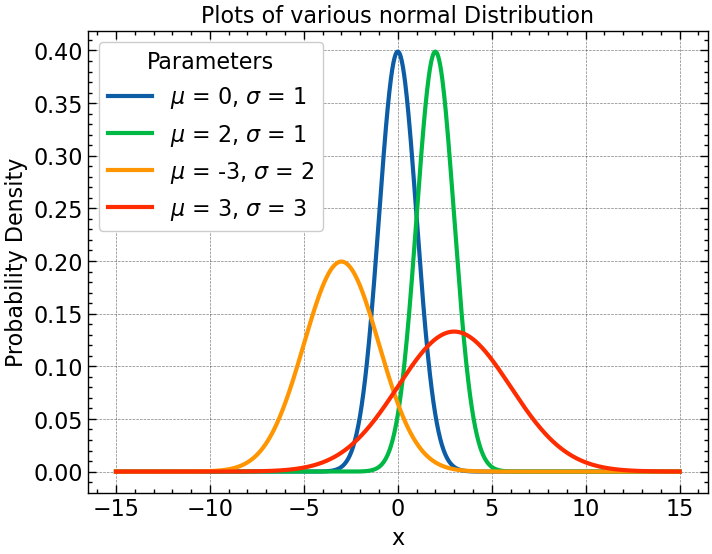

In [31]:
mu_sigma=np.array([[0,2,-3,3], #mu
                  [1,1,2,3]]) #sigma
for iter in range(mu_sigma.shape[1]):
    x=np.linspace(-15,15,999)
    label=f'$\mu$ = {mu_sigma[0,iter]}, $\sigma$ = {mu_sigma[1,iter]}'
    plt.plot(x, norm.pdf(x, mu_sigma[0,iter], mu_sigma[1,iter]), label=label, lw=3)
    
plt.legend(loc="upper left", bbox_to_anchor=(0,1), title="Parameters")
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Plots of various normal Distribution')
plt.show()

### Normal Distribution: Empirical Rule

In [22]:
mean=0.13
std=2.34
x=2.47
Z_cal = (x - mean) / std
print(f'*** Mean = {mean} and standard deviation = {std} ***')
print(f'P(X < {x}) = {np.round(norm.cdf(Z_cal), 3)*100}%')
print(f'P(X > {x}) = {np.round(1- norm.cdf(Z_cal), 3)*100}%')

*** Mean = 0.13 and standard deviation = 2.34 ***
P(X < 2.47) = 84.1%
P(X > 2.47) = 15.9%


## 2.5 Probability distribution of SPDR S&P500 ETF Trust daily % Change

In [23]:
import yfinance as yf
import datetime

In [24]:
def download_data(stock, start_date, end_date):
    data = {}
    ticker = yf.download(stock, start_date, end_date)
    data[stock] = ticker['Adj Close']
    return pd.DataFrame(data)

In [25]:
start = datetime.datetime(2020, 1, 20)
end = datetime.datetime(2022, 1, 22)

stock_data = download_data('SPY', start, end)

stock_data['returns'] = np.round((stock_data['SPY'].shift(-1)-stock_data['SPY'])*100/stock_data['SPY'],3)
stock_data=stock_data[:-1]

[*********************100%***********************]  1 of 1 completed


In [26]:
stock_data

,SPY,returns
Date,,
2020-01-21,315.824554,0.012
2020-01-22,315.862671,0.115
2020-01-23,316.224945,-0.889
2020-01-24,313.412750,-1.603
2020-01-27,308.388885,1.048
...,...,...
2022-01-13,457.114075,0.041
2022-01-14,457.301086,-1.771
2022-01-18,449.202423,-1.038


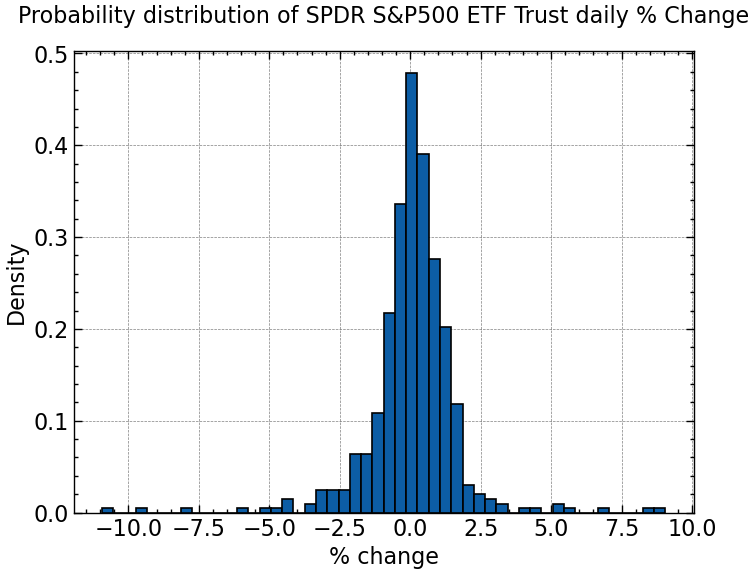

In [32]:
plt.hist(stock_data["returns"], edgecolor='black', linewidth=1.2, bins=50, density=True)
plt.xlabel('% change')
plt.ylabel('Density')
plt.title('Probability distribution of SPDR S&P500 ETF Trust daily % Change', pad=20)
plt.show()

In [28]:
exp_ret=np.round(stock_data['returns'].mean(), 3)
vol=np.round(stock_data['returns'].std(ddof=1), 3)
print(f' For SPDR S&P500 ETF Trust, the daily expected return is {exp_ret}% and the daily volatility is {vol}%')

 For SPDR S&P500 ETF Trust, the daily expected return is 0.074% and the daily volatility is 1.603%
